# Imports 

In [ ]:
import numpy as np #NumPy pour Numerical Python, pour travailler avec des arrays
from matplotlib import pyplot as plt #pour faire des graphiques  
%matplotlib inline
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(0)

# Données

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape) #60 000 images de 28x28 pixels, avec 60 000 valeurs (de 0 à 9) allant avec les images pour l'entrainement
print(x_test.shape, y_test.shape) #10 000 images et leurs 10 000 valeurs pour tester l'algorithme

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Exemples

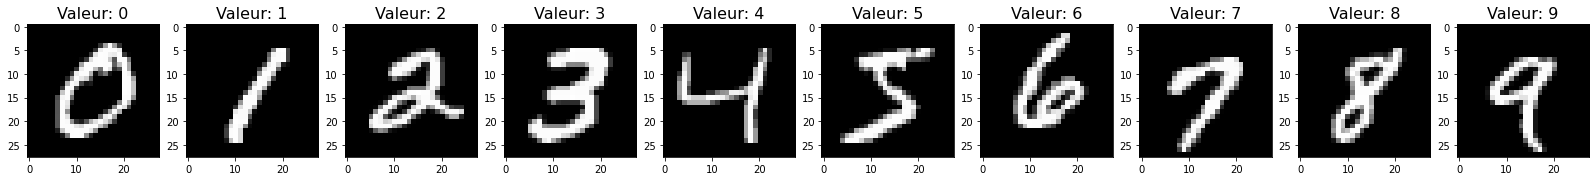

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(28,28))
#Seulement à titre d'exemple de ce que j'utilise pour l'algorithme
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]#image x_train avec le y_train correspondant, 0 veut dire la première image de la pile d'images de cette valeur
  ax[i].imshow(sample, cmap='gray')#Affichage de l'image en grayscale
  ax[i].set_title("Valeur: {}".format(i), fontsize=16)#Affichage de l'en-tête

In [ ]:
for i in range(10):#Les valeurs de y_train
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
#Ces 2 lignes de code permettent à l'algorithme de faire des prédictions plus concrètes
#Par exemple, le y_test est un 5 mais l'algorithme hésite entre 5 et 3
#Plutôt que de dire une valeur entre 3 et 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])
#Il va prédire 0.92 à la 5iem position et 0.08 à la 3iem position
#Ici comme ce sont les valeurs en tant que telles et non des prédictions, il y a que des 1 aux mêmes endroits que plus haut

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Préparation des données

In [ ]:
#Normalisation des données
#Les images grayscale ont des tons de variant de 0 à 255, 0 étant noir et 255 étant blanc
#En le normalisant, on s'assure que les valeurs des tons sont entre 0 et 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Redimension des données
#Plutôt que d'envoyer dans l'algorithme des images de 28x28, je le redimensionne en 1 long vecteur de 784 (784 = 28*28)
x_train = x_train.reshape(x_train.shape[0], -1)#0 pour garder le même nombre d'images, et -1 pour redimensionner à 784
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Création du modèle
Réseau de neurones

In [ ]:
model = Sequential()#Un modèle Sequential dans Keras nous permet d'ajouter plusieurs couches, ce modèle a 1 input et 1 output seulement (image, valeur)
#units est le nombre de neurones dans chaque couche, shape est la dimension de l'entrée, activation est la fonction d'activation de l'algorithme (rectified linear unit)
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
#Dropout veut dire que 25% des neurones seront perdu aléatoirement pour rendre modèle meilleur pour généraliser (les autres neurones vont prendre la place de ceux qui sont perdus)
#Cette généralisation amènera des meilleures prédictions
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))#softmax converti un vecteur de nombres en un vecteur de probabilités
#Compilation du modèle et affichage
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Entrainement du modèle 

In [ ]:
batch_size = 512#nombre d'images passées à la fois
epochs=20#nombre de fois que je passe les 60 000 images
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 2/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0434 - accuracy: 0.9870
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0396 - accuracy: 0.9881
Epoch 4/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0361 - accuracy: 0.9894
Epoch 5/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 7/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 8/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0251 - accuracy: 0.9923
Epoch 9/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0203 - accuracy: 0.9938
Epoch 10/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0187 - accuracy: 0

In [ ]:
#On peut voir qu'après chaque epoch, la précision augmente, et la perte diminue

#Évaluation

In [ ]:
perte, precision = model.evaluate(x_test, y_test)#Je passe les valeurs tests dans le modèle
print("Perte: {}, Précision: {}".format(perte, precision))#Affichage des résultats

313/313 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9796
Perte: 0.0824124813079834, Précision: 0.9796000123023987


#Exemples de prédictions

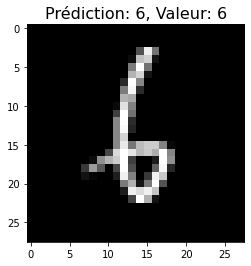

In [ ]:
#Bonne prédiction
random_index = np.random.choice(len(x_test)) #index aléatoire parmis les valeurs test
x_sample = x_test[random_index] #image aléatoire
y_true = np.argmax(y_test, axis=1) #graduation des axes
y_sample_true = y_true[random_index] #bonne valeur de l'image
y_sample_pred_class = y_pred_classes[random_index] #prédiction de l'image
#Affichage 
plt.title("Prédiction: {}, Valeur: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

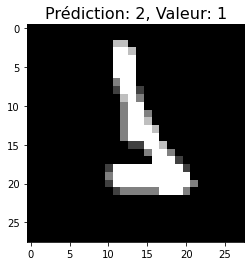

In [ ]:
#Mauvaise prédiction suite à plusieurs essais de générations aléatoires
random_index = np.random.choice(len(x_test)) #index aléatoire parmis les valeurs test
x_sample = x_test[random_index] #image aléatoire
y_true = np.argmax(y_test, axis=1) #graduation des axes
y_sample_true = y_true[random_index] #bonne valeur de l'image
y_sample_pred_class = y_pred_classes[random_index] #prédiction de l'image
#Affichage 
plt.title("Prédiction: {}, Valeur: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')